## Importaciones

In [6]:
import requests
import time
import pickle

## Headers

In [7]:
url_headers = {
    "accept": "application/json",
    "X-MAL-CLIENT-ID": "dba80244ba88ffa1c4914806e9ccb3e4",
}

animedetail_params = {"fields": "title,num_list_users"}

## Procesamiento

In [8]:
generos_ids = {
    "Action": 1,
    "Adventure": 2,
    "Avant Garde": 5,
    "Award Winning": 6,
    "Boys Love": 7,
    "Comedy": 8,
    "Dementia": 9,
    "Demons": 10,
    "Drama": 11,
    "Ecchi": 12,
    "Fantasy": 13,
    "Game": 14,
    "Harem": 15,
    "Historical": 16,
    "Horror": 17,
    "Josei": 18,
    "Kids": 19,
    "Magic": 20,
    "Martial Arts": 21,
    "Mecha": 22,
    "Military": 23,
    "Music": 24,
    "Mystery": 25,
    "Parody": 26,
    "Police": 27,
    "Psychological": 28,
    "Romance": 29,
    "Samurai": 30,
    "School": 31,
    "Sci-Fi": 32,
    "Seinen": 33,
    "Shoujo": 34,
    "Shounen": 35,
    "Slice of Life": 36,
    "Space": 37,
    "Sports": 38,
    "Super Power": 39,
    "Supernatural": 40,
    "Vampire": 41,
    "Yaoi": 42,
    "Yuri": 43,
}

In [16]:
# ## 4️⃣ Función para extraer IDs de animes por género desde MAL
def obtener_animes_por_genero(genero_id, pagina=1):
    url = f"https://api.jikan.moe/v4/anime"
    params = {"genres": genero_id, "page": pagina}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        print(f"Género ID {genero_id}, Página {pagina} - Datos obtenidos con éxito.")
        return response.json()["data"]
    else:
        print(
            f"Error al obtener datos para el género ID {genero_id} en la página {pagina}: {response.status_code}"
        )
        return []

In [17]:
def obtener_todos_animes_por_genero(genero_id):
    pagina = 1
    animes = []
    while True:
        datos = obtener_animes_por_genero(genero_id, pagina)
        if not datos:
            break
        animes.extend(datos)
        pagina += 1
        time.sleep(1)  # Para evitar exceder el límite de tasa de la API
    return animes

In [18]:
import pandas as pd


def calcular_popularidad_generos(generos_ids):
    datos_generos = []
    total_miembros = 0

    for genero, genero_id in generos_ids.items():
        print(f"Obteniendo datos para el género: {genero}")
        animes = obtener_todos_animes_por_genero(genero_id)
        miembros_genero = sum(anime["members"] for anime in animes)
        datos_generos.append({"Género": genero, "Miembros": miembros_genero})
        total_miembros += miembros_genero

    df = pd.DataFrame(datos_generos)
    df["Popularidad Relativa (%)"] = (df["Miembros"] / total_miembros) * 100
    return df.sort_values(by="Popularidad Relativa (%)", ascending=False)

In [9]:
# Celda 4: Función para obtener cantidad de animes por género usando Jikan
def contar_animes_por_genero(genre_id, max_retries=5):
    url = f"https://api.jikan.moe/v4/anime?genres={genre_id}&limit=1"
    retries = 0
    while retries < max_retries:
        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                return data["pagination"]["items"]["total"]  # total de animes
            elif response.status_code == 429:
                print("⏳ Límite de peticiones alcanzado, esperando 60s...")
                time.sleep(60)
                retries += 1
            else:
                print(f"⚠️ Error {response.status_code}: {response.text}")
                return None
        except Exception as e:
            print(f"⚠️ Error en request: {e}")
            retries += 1
            time.sleep(10)
    return None

In [11]:
# Celda 5: Crear un diccionario con la cantidad de animes por género
conteo_generos = {}
for nombre, gid in generos_ids.items():
    print(f"Contando animes de género {nombre}...")
    total = contar_animes_por_genero(gid)
    conteo_generos[nombre] = total
    time.sleep(2)  # evitar rate-limit


# Celda 6: Convertir a DataFrame
df_conteo = pd.DataFrame(
    list(conteo_generos.items()), columns=["genero", "cantidad_animes"]
)
df_conteo



Contando animes de género Action...
Contando animes de género Adventure...
Contando animes de género Avant Garde...
Contando animes de género Award Winning...
Contando animes de género Boys Love...
Contando animes de género Comedy...
Contando animes de género Dementia...
Contando animes de género Demons...
Contando animes de género Drama...
Contando animes de género Ecchi...
Contando animes de género Fantasy...
Contando animes de género Game...
Contando animes de género Harem...
Contando animes de género Historical...
Contando animes de género Horror...
Contando animes de género Josei...
Contando animes de género Kids...
Contando animes de género Magic...
Contando animes de género Martial Arts...
Contando animes de género Mecha...
Contando animes de género Military...
Contando animes de género Music...
Contando animes de género Mystery...
Contando animes de género Parody...
Contando animes de género Police...
Contando animes de género Psychological...
Contando animes de género Romance.

,genero,cantidad_animes
0,Action,5652
1,Adventure,4417
2,Avant Garde,1064
3,Award Winning,640
4,Boys Love,1002
5,Comedy,3097
6,Dementia,820
7,Demons,6023
8,Drama,338
9,Ecchi,1592


In [19]:
df_popularidad = calcular_popularidad_generos(generos_ids)
df_popularidad

Obteniendo datos para el género: Action
Género ID 1, Página 1 - Datos obtenidos con éxito.
Género ID 1, Página 2 - Datos obtenidos con éxito.
Género ID 1, Página 3 - Datos obtenidos con éxito.
Género ID 1, Página 4 - Datos obtenidos con éxito.
Género ID 1, Página 5 - Datos obtenidos con éxito.


KeyboardInterrupt: 

In [ ]:
df_popularidad

In [10]:
import pandas as pd

# Celda 2: Cargar el archivo .pkl
df_pop = pd.read_pickle("df_popularidad.pkl")
df_pop.head()

# Celda 4: Ordenar de mayor a menor por la columna de popularidad
# (ajusta el nombre de la columna si es distinto, ej: "popularidad" o "porcentaje")
df_sorted = df_pop.sort_values(by="Popularidad Relativa (%)", ascending=False)


# Celda 5: Mostrar solo el top 10
df_sorted.head(10)

,Género,Miembros,Popularidad Relativa (%)
0,Action,525981584,13.176293
7,Demons,344203114,8.622585
24,Police,341949912,8.566140
20,Military,307334075,7.698984
5,Comedy,271421970,6.799355
19,Mecha,268085043,6.715762
1,Adventure,242848251,6.083558
34,Space,167171753,4.187797
21,Music,161155275,4.037079
38,Vampire,124481069,3.118358


In [13]:
# df_pop rename Género a genero

df_pop.rename(columns={"Género": "genero"}, inplace=True)

In [5]:
# Sumar los valores de la columna "Popularidad Relativa (%)"
total_popularidad = df_sorted["Popularidad Relativa (%)"].sum()

print(f"Total Popularidad Relativa (%): {total_popularidad}")

Total Popularidad Relativa (%): 100.0


In [14]:
# Celda 7: Unir al DataFrame original
df_pop = df_pop.merge(df_conteo, on="genero", how="left")
df_pop

,genero,Miembros,Popularidad Relativa (%),cantidad_animes
0,Action,525981584,13.176293,5652
1,Demons,344203114,8.622585,6023
2,Police,341949912,8.566140,2133
3,Military,307334075,7.698984,2231
4,Comedy,271421970,6.799355,3097
5,Mecha,268085043,6.715762,2189
6,Adventure,242848251,6.083558,4417
7,Space,167171753,4.187797,1564
8,Music,161155275,4.037079,3453
9,Vampire,124481069,3.118358,456


In [17]:
df_pop = pd.read_pickle(("df_popularidad.pkl"))

In [20]:
# Celda 1: Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

df_pop = pd.read_pickle("df_popularidad.pkl")
df_pop.rename(columns={"Popularidad Relativa (%)": "popularidad"}, inplace=True)

df_pop.head()

,genero,Miembros,popularidad,cantidad_animes
0,Action,525981584,13.176293,5652
1,Demons,344203114,8.622585,6023
2,Police,341949912,8.566140,2133
3,Military,307334075,7.698984,2231
4,Comedy,271421970,6.799355,3097


In [21]:
# Celda 3: Preparar datos para la regresión
X = df_pop["cantidad_animes"].values.reshape(-1, 1)  # variable independiente
y = df_pop["popularidad"].values  # variable dependiente (% popularidad)

In [22]:
# Celda 4: Ajustar regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predicciones
y_pred = modelo.predict(X)

# Coeficientes
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_
r2 = modelo.score(X, y)

print(f"Modelo: Popularidad = {pendiente:.6f} * Cantidad_animes + {intercepto:.4f}")
print(f"R² = {r2:.4f}")

Modelo: Popularidad = 0.001000 * Cantidad_animes + 0.9230
R² = 0.3447


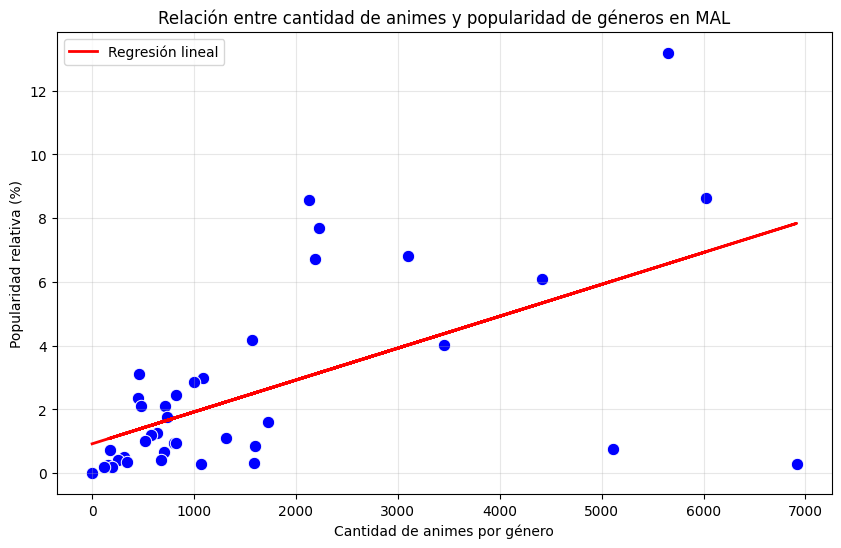

In [23]:
# Celda 5: Gráfico de dispersión + regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x="cantidad_animes", y="popularidad", data=df_pop, s=80, color="blue")

# Línea de regresión
plt.plot(
    df_pop["cantidad_animes"],
    y_pred,
    color="red",
    linewidth=2,
    label="Regresión lineal",
)

# Etiquetas
plt.xlabel("Cantidad de animes por género")
plt.ylabel("Popularidad relativa (%)")
plt.title("Relación entre cantidad de animes y popularidad de géneros en MAL")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [25]:
# Celda 8: Guardar actualizado
df_pop.to_pickle("df_popularidad.pkl")
df_pop.sort_values("popularidad", ascending=False)

,genero,Miembros,popularidad,cantidad_animes
0,Action,525981584,13.176293,5652
1,Demons,344203114,8.622585,6023
2,Police,341949912,8.566140,2133
3,Military,307334075,7.698984,2231
4,Comedy,271421970,6.799355,3097
5,Mecha,268085043,6.715762,2189
6,Adventure,242848251,6.083558,4417
7,Space,167171753,4.187797,1564
8,Music,161155275,4.037079,3453
9,Vampire,124481069,3.118358,456
